In [24]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

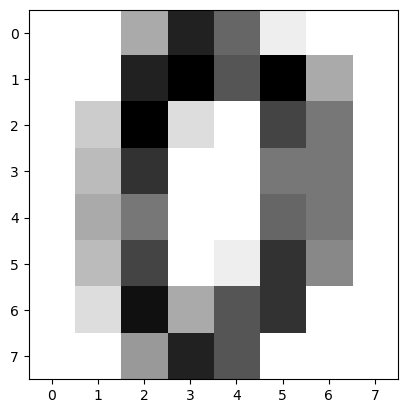

In [26]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [28]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [30]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
n_samples = len(X)
X = digits.images.reshape((n_samples, -1))

In [34]:
Y = digits.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
Y = pd.get_dummies(Y).values
Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [40]:
#Defining the model 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(13,input_shape=(X_train[1].shape),activation='relu')) # 입력층 최소 입력이랑 갯수 똑같게
model.add(Dense(64,activation='relu')) # 히든층
model.add(Dense(80,activation='relu')) # 히든층
model.add(Dense(80,activation='relu')) # 히든층
model.add(Dense(60,activation='relu')) # 히든층
model.add(Dense(10,activation='softmax')) # 출력층  출력이랑 갯수 똑같게
#히든층은 마름모꼴 구조로 만드는걸 교수님은 추천 혹은 피라미드 구조

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # 이진분류냐 삼중분류냐 등에 따라서 바뀌어야됨

model.summary()

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 13)                  │             845 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 80)                  │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 60)                  │           4,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,891 (73.79 KB)

 Trainable params: 18,891 (73.79 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
# 원핫인코딩한거 다시 원상태로 되돌리는 부분 왜냐면 성능테스트할 때 비교할려면 원본상태로 돌려야됨

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3850 - loss: 1.8976 - val_accuracy: 0.6833 - val_loss: 0.9178
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7239 - loss: 0.7785 - val_accuracy: 0.7944 - val_loss: 0.6233
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8322 - loss: 0.4551 - val_accuracy: 0.8639 - val_loss: 0.4518
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8834 - loss: 0.3302 - val_accuracy: 0.8722 - val_loss: 0.3969
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9198 - loss: 0.2459 - val_accuracy: 0.8972 - val_loss: 0.3138
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9286 - loss: 0.2062 - val_accuracy: 0.9139 - val_loss: 0.2918
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.1587 - val_accuracy: 0.9194 - val_loss: 0.2812
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9573 - loss: 0.1309 - val_accuracy: 0.9194 - val_loss

In [43]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.89      0.97      0.93        32
           2       0.91      1.00      0.95        30
           3       1.00      0.94      0.97        33
           4       1.00      0.94      0.97        36
           5       0.97      0.97      0.97        40
           6       0.97      0.97      0.97        36
           7       0.97      0.94      0.96        36
           8       0.97      0.73      0.83        44
           9       0.76      0.97      0.85        35

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

[[37  0  0  0  0  0  0  0  0  1]
 [ 0 31  1  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 1  0  0 31  0  0  0  0  0  1]
 [ 0  0  0  0 34  0  1  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0